In [1]:
#conncet to Google drive
from google.colab import drive
drive.mount('/content/drive')
     

Mounted at /content/drive


In [ ]:
#install required packs
!pip install geopandas
!pip install cartopy
!pip install pandas==1.5.3
!pip install basemap
!pip install basemap-data-hires
!pip install matplotlib-scalebar
!pip install rasterio 
!pip install plotly
!pip install richdem
!pip install georaster

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 67.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 51.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 6.2 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp39-cp39-linux_x86_64.whl size=11113643 sha256=a4e3e31371e049d38f8eba6e785c127ece551664e30c96d98f8be8cb141db6a6
  Stored in directory: /root/.cache/pip/wheels/74/b9/f5/2c94acd7cd21480e6cf63169144d7aac3e8d9cf638225

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 MB 8.7 MB/s eta 0:00:00


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 19.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.4/329.4 KB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for richdem: filename=richdem-0.3.4-cp39-cp39-linux_x86_64.whl size=7970668 sha256=d38baffe725050f8188345d9361202283b6e59c6d957c71476e8ba612a1513b8
  Stored in directory: /root/.cache/pip/wheels/c3/e1/43/02e9a8e971c959066d5725ecb303dc327c6a9fc8a1b9d714c1
Successfully built richdem
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Pr

In [ ]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, Polygon
import pickle
from geographiclib.geodesic import Geodesic
import cartopy.crs as ccrs
import math
import cartopy.feature as cfeature
from mpl_toolkits.basemap import Basemap
from matplotlib_scalebar.scalebar import ScaleBar
import rasterio as rio
from rasterio.plot import show
import os
import richdem as rd
import plotly.graph_objects as go
import plotly.express as px
import georaster
from matplotlib.gridspec import GridSpec
from PIL import Image
from rasterio.merge import merge

In [ ]:
df_xbd_points_path ='/content/drive/MyDrive/ai4er/python/hurricane/hurricane-harm-herald/data/datasets/processed_data/metadata_pickle/lnglat_pre_pol_post_damage.pkl'
building_data_full = pd.read_pickle(df_xbd_points_path)

In [ ]:
#load building data
df_xbd_points_path ='/content/drive/MyDrive/ai4er/python/hurricane/hurricane-harm-herald/data/datasets/processed_data/metadata_pickle/lnglat_pre_pol_post_damage.pkl'
building_data = pd.read_pickle(df_xbd_points_path)
building_locs=pd.DataFrame({'lat':building_data['geometry'].y,'lon':building_data['geometry'].x ,'disaster_name':building_data['disaster_name'],'damage_class':building_data['damage_class']})
# Standarize the name of hurricane
building_locs['disaster_name'] = building_locs['disaster_name'].replace('hurricane-florence', 'FLORENCE')
building_locs['disaster_name'] = building_locs['disaster_name'].replace('hurricane-michael', 'MICHAEL')
building_locs['disaster_name'] = building_locs['disaster_name'].replace('hurricane-matthew', 'MATTHEW')
building_locs['disaster_name'] = building_locs['disaster_name'].replace('hurricane-harvey', 'HARVEY')

lon_bins = pd.cut(building_locs['lon'], bins=range(-180, 181, 1))
lat_bins = pd.cut(building_locs['lat'], bins=range(-90, 91, 1))
temp_building_groups = building_locs.groupby([lon_bins, lat_bins])


building2tracks=pd.DataFrame({'lat':building_locs['lat'],'lon':building_locs['lon'] ,'disaster_name':building_locs['disaster_name'],'damage_class':building_locs['damage_class']})
building_groups = building2tracks.groupby('disaster_name')

#load hurricane data
df_noaa_xbd_hurricanes_path='/content/drive/MyDrive/ai4er/python/hurricane/hurricane-harm-herald/data/datasets/EFs/weather_data/noaa_xbd_hurricanes.pkl'
df_noaa_xbd_hurricanes=pd.read_pickle(df_noaa_xbd_hurricanes_path)

hurricane_groups = df_noaa_xbd_hurricanes.groupby('name')

#group hurricane data
hurricane_groups_original = df_noaa_xbd_hurricanes.groupby('name')
for j, (hurricane_name,hurricane_data) in enumerate(hurricane_groups_original):
        print(hurricane_data.loc[hurricane_data.index[0], 'name'])

FLORENCE
HARVEY
MATTHEW
MICHAEL


In [ ]:
# The function to set the range of plot
def set_close_range(gruop_data,dis_threshold:float):
    west=min(group_data['lon'])
    east=max(group_data['lon'])
    south=min(group_data['lat'])
    north=max(group_data['lat'])

    width=abs(east-west)
    height=abs(north-south)
    as_adj= 0.5*abs(width-height) #value to adjust aspect ratio

    if width>height:
          west=west-dis_threshold
          east= east+dis_threshold
          south=south-dis_threshold-as_adj
          north=north+dis_threshold+as_adj
    else:
          west=west-dis_threshold-as_adj 
          east= east+dis_threshold+as_adj
          south=south-dis_threshold
          north=north+dis_threshold
    return west,east,south,north

# Some functions that help to plot

In [ ]:
# the function to plot buildings
color=['k','crimson','darkorange','darkgreen','mediumseagreen']
def plot_damage_class(ax, group_data,show_label=False,s=1):
  if show_label:
    ax.scatter(x=group_data.loc[group_data['damage_class'] == 0,'lon'], y=group_data.loc[group_data['damage_class'] == 0,'lat'], s=s,color=color[4],alpha=1, label="No Damage")
    ax.scatter(x=group_data.loc[group_data['damage_class'] == 1,'lon'], y=group_data.loc[group_data['damage_class'] == 1,'lat'], s=s,color=color[3],alpha=0.7,label="Minor Damge")
    ax.scatter(x=group_data.loc[group_data['damage_class'] == 2,'lon'], y=group_data.loc[group_data['damage_class'] == 2,'lat'], s=s,color=color[2],alpha=0.5,label="Major Damage")
    ax.scatter(x=group_data.loc[group_data['damage_class'] == 3,'lon'], y=group_data.loc[group_data['damage_class'] == 3,'lat'], s=s,color=color[1],alpha=0.3,label="Destroyed")
    #ax.scatter(x=group_data.loc[group_data['damage_class'] == 4,'lon'], y=group_data.loc[group_data['damage_class'] == 4,'lat'], color=color[0],alpha=0.5,label="Unclassified")
  else:
    ax.scatter(x=group_data.loc[group_data['damage_class'] == 0,'lon'], y=group_data.loc[group_data['damage_class'] == 0,'lat'], s=s,color=color[4],alpha=1, label="_nolegend_")
    ax.scatter(x=group_data.loc[group_data['damage_class'] == 1,'lon'], y=group_data.loc[group_data['damage_class'] == 1,'lat'], s=s,color=color[3],alpha=0.7,label="_nolegend_")
    ax.scatter(x=group_data.loc[group_data['damage_class'] == 2,'lon'], y=group_data.loc[group_data['damage_class'] == 2,'lat'], s=s,color=color[2],alpha=0.5,label="_nolegend_")
    ax.scatter(x=group_data.loc[group_data['damage_class'] == 3,'lon'], y=group_data.loc[group_data['damage_class'] == 3,'lat'], s=s,color=color[1],alpha=0.3,label="_nolegend_")


    

In [ ]:
# function to plot hurricanes
def plot_hurricanes(fig,ax1,ax2,Hurricane2plot,hurricane_data,group_data,row,dis,show_N=False):

  ax=ax1
  dis_threshold=12 # add the extract space to the figure
  west,east,south,north=set_close_range(group_data,dis_threshold)
  ax.set_xlim(west, east)
  ax.set_ylim(south, north)

  ax.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=0.5)
  ax.add_feature(cfeature.LAND.with_scale('10m'))
  ax.add_feature(cfeature.OCEAN.with_scale('10m'))
  ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='#c7c783', zorder=0)
  
  ax.text(west+0.06*(east-west), south+0.06*(north-south), Hurricane2plot, fontsize=10)

  ax.plot(hurricane_data['lon'], hurricane_data['lat'],transform=ccrs.PlateCarree(),label='Hurricane trajectory',c='k',zorder=1)

  #ax.scatter(hurricane_data['lon'], hurricane_data['lat'], s=5, transform=ccrs.PlateCarree())
  for index in range(6):
    temp_data=hurricane_data[hurricane_data['strength'] == index]
    ax.scatter(temp_data['lon'], temp_data['lat'], s=(index+5)**2, c='gray',transform=ccrs.PlateCarree(),marker='o',facecolor='none',zorder=2,label=f'Cat {index}')

  plot_damage_class(ax=ax,group_data=group_data,show_label=False,s=5)
  
  fig_width=fig.get_size_inches()[0]
  dpi=fig.get_dpi()

  pixel_length=(east-west)*110/12*(300)
  scalebar = ScaleBar(pixel_length,'km') # 1 pixel = x meter
  ax.add_artist(scalebar)
  if row==0:
   ax.legend()



  ax = ax2
  dis_threshold=dis # add the extract space to the figure
  west,east,south,north=set_close_range(group_data,dis_threshold)
  west=west
  east=east
  ax.set_xlim(west, east)
  ax.set_ylim(south, north)

  ax.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=0.5)
  ax.add_feature(cfeature.LAND.with_scale('10m'))
  ax.add_feature(cfeature.OCEAN.with_scale('10m'))
  ax.plot(hurricane_data['lon'], hurricane_data['lat'],transform=ccrs.PlateCarree())
  temp=np.array([hurricane_data['lon'],hurricane_data['lat']])
  temp=np.flip(temp, axis=1)
  x=temp[0,:]
  y=temp[1,:]
  ax.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=2,width=0.01)

  for index in range(6):
    temp_data=hurricane_data[hurricane_data['strength'] == index]
    ax.scatter(temp_data['lon'], temp_data['lat'], s=(index+5)**2, c='gray',transform=ccrs.PlateCarree(),label='_nolegend_',marker='o',facecolor='none',zorder=2)


  x=west+0.1*(east-west)
  y=north-0.2*(north-south)
  dx=0
  dy=0.01
  if show_N:
    ax.arrow(x, y, dx, dy, width=0.03*(east-west),color='black', shape='full')
    ax.text(x+0.05*(east-west), y+0.06*(north-south), 'N', fontsize=20)

  plot_damage_class(ax=ax,group_data=group_data,show_label=True,s=2)

  pixel_length=(east-west)*110/12*(300)
  scalebar = ScaleBar(pixel_length,'km') # 1 pixel = x meter
  ax.add_artist(scalebar)
  if row==0:
   ax.legend(loc='lower left')




# Plot building label and hurricane tracks

In [ ]:
#plot original hurricane tracks and building locations


n_cols=2                        #column number
n_rows =4
t_dpi=300

hurricane_list=['MICHAEL','FLORENCE','HARVEY','MATTHEW']
fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 6*n_rows),dpi=t_dpi,     
                        subplot_kw={'projection': ccrs.PlateCarree()})
dis=[0.2,0.3,1.2,0.6]
for i in range(4):
  Hurricane2plot=hurricane_list[i]
  hurricane_data=hurricane_groups.get_group(Hurricane2plot) #get the interpolated hurricane data
  group_data=building_groups.get_group(Hurricane2plot)
  if i==0:
    show_N=True
  else:
    show_N=False

  plot_hurricanes(fig=fig,ax1=axs[i,0],ax2=axs[i,1],Hurricane2plot=Hurricane2plot,hurricane_data=hurricane_data,group_data=group_data,row=i,dis=dis[i],show_N=show_N)

plt.subplots_adjust(wspace=0, hspace=0.01)
plt.show()

fig.savefig('/content/drive/MyDrive/Colab Notebooks/hurricane.png', dpi=300, format="png", bbox_inches="tight")


img=rio.open('/content/drive/MyDrive/ai4er/python/hurricane/hurricane-harm-herald/data/datasets/xBD_data/geotiffs.old/hold/images/hurricane-michael_00000215_post_disaster.tif')
img_array = img.read().astype('float64')
fig,axes=plt.subplots(1,4,figsize=(11.8,3),dpi=t_dpi)

label=['No damage','Minor damage','Major damage','Destroyed']
for i in range(4):
    ax=axes[i]
    rio.plot.show(img.read(),ax=ax)
    b_position=np.array([[300,870],[820,880],[820,600],[600,340]])
    x=b_position[i,0]
    y=b_position[i,1]
    buffer=50
    ax.set_xlim(x-buffer,x+buffer)
    ax.set_ylim(y-buffer,y+buffer)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(label[i],y=0,fontdict={"fontsize": 15, "fontweight": "bold", "color": "white"})

plt.subplots_adjust(wspace=0.02, hspace=0.001)
plt.show()
fig.savefig('/content/drive/MyDrive/Colab Notebooks/damage_buildings.png', dpi=300, format="png", bbox_inches="tight")


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#merge image

img1 = Image.open('/content/drive/MyDrive/Colab Notebooks/hurricane.png')
img2 = Image.open('/content/drive/MyDrive/Colab Notebooks/damage_buildings.png')

w1, h1 = img1.size
w2, h2 = img2.size

result = Image.new("RGB", (w1, h1+h2))
result.paste(img1, (0, 0))
result.paste(img2, (0, h1))

result.show()

Output hidden; open in https://colab.research.google.com to view.

# Plot terrain features and Soil contents

In [ ]:
# plot the lots of EFs
num_cols = 4
num_rows = 7

extracted_path='/content/drive/MyDrive/ai4er/python/hurricane/hurricane-harm-herald/data/datasets/EFs/terrain_data/DEM_data/DEM_extracted/'
dem_list=[f'{extracted_path}merged_N33W80.tif',f'{extracted_path}merged_N2930W96.tif',f'{extracted_path}merged_N18W7574.tif',f'{extracted_path}ASTGTMV003_N30W086_dem.tif']

# Create a new figure with the appropriate number of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(30,30),dpi=200)

dis_threshold=0
path=['/content/drive/MyDrive/interactive_figure/bdod_0-5cm_mean_1000.tif',
        '/content/drive/MyDrive/interactive_figure/clay_0-5cm_mean_1000.tif',
        '/content/drive/MyDrive/interactive_figure/sand_0-5cm_mean_1000.tif',
        '/content/drive/MyDrive/interactive_figure/silt_0-5cm_mean_1000.tif']

label=['soil density (cg/cm${^3}$)','clay content (g/kg)','sand content (g/kg)','silt content (g/kg)']

for i, (group_name,group_data) in enumerate(building_groups):
    west,east,south,north=set_close_range(group_data,dis_threshold)
  
    dem=rio.open(dem_list[i])
    dem_array = dem.read(1).astype('float64')
    dem4slope  = rd.rdarray(dem_array, no_data=-9999) 
    dem4slope.geotransform = [0,1,0,0,0,1,0] # defining the geotransfrom, the top left corner is (0,0), width and heigth of a pixel is 1
    slope = rd.TerrainAttribute(dem4slope, attrib='slope_riserun') #calculate slope
    aspect = rd.TerrainAttribute(dem4slope, attrib='aspect') # calculate aspect


    ax=axs[0,i]
    ax.set_xlim(west, east)
    ax.set_ylim(south, north)
    handle=rio.plot.show(dem_array,transform=dem.transform,ax=ax,title=group_name,cmap='Greys',vmin=0,vmax=np.percentile(dem_array,90)) #plot DEM map 
    im = handle.get_images()[0]
    cbar=fig.colorbar(im,ax=ax)
    cbar.set_label('Elevation (m)')
    #ax.set_xlabel('Longitude(°)')
    #ax.set_ylabel('Latitude(°)')
    if i==0:
      plot_damage_class(ax,group_data,show_label=True,s=5)
    else:
      plot_damage_class(ax,group_data,show_label=False,s=5)

    ax=axs[1,i]
    ax.set_xlim(west, east)
    ax.set_ylim(south, north)
    handle=rio.plot.show(slope,transform=dem.transform,ax=ax,cmap='Greys',vmin=0,vmax=np.percentile(slope,95)) #plot DEM map 
    im = handle.get_images()[0]
    cbar=fig.colorbar(im,ax=ax)
    cbar.set_label('Slope (%)')
    #ax.set_xlabel('Longitude(°)')
    #ax.set_ylabel('Latitude(°)')
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    plot_damage_class(ax,group_data,show_label=False,s=5)



    ax=axs[2,i]
    ax.set_xlim(west, east)
    ax.set_ylim(south, north)
    handle=rio.plot.show(aspect,transform=dem.transform,ax=ax,cmap='Greys',vmin=0,vmax=np.percentile(aspect,95)) #plot DEM map 
    im = handle.get_images()[0]
    cbar=fig.colorbar(im,ax=ax)
    cbar.set_label('Aspect (°)')
    #ax.set_xlabel('Longitude(°)')
    #ax.set_ylabel('Latitude(°)')
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    plot_damage_class(ax,group_data,show_label=False,s=5)

    
    ax=axs[3,i]
    image = georaster.SingleBandRaster(path[0], \
                        load_data=(west, east, south, north), \
                    latlon=True)
    image = image.r
    image[image < 0] = 0
    im=ax.imshow(image,extent=(west,east,south,north),cmap='Greys')
    cbar=fig.colorbar(im,ax=ax)
    cbar.set_label(label[0])
    #ax.set_xlabel('Longitude(°)')
    #ax.set_ylabel('Latitude(°)')
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    plot_damage_class(ax,group_data,show_label=False,s=5)



    ax=axs[4,i]
    image = georaster.SingleBandRaster(path[1], \
                        load_data=(west, east, south, north), \
                    latlon=True)
    image = image.r
    image[image < 0] = 0
    im=ax.imshow(image,extent=(west,east,south,north),cmap='Greys')
    cbar=fig.colorbar(im,ax=ax)
    cbar.set_label(label[1])
    #ax.set_xlabel('Longitude(°)')
    #ax.set_ylabel('Latitude(°)')
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    plot_damage_class(ax,group_data,show_label=False,s=5)


    ax=axs[5,i]
    image = georaster.SingleBandRaster(path[2], \
                        load_data=(west, east, south, north), \
                    latlon=True)
    image = image.r
    image[image < 0] = 0
    im=ax.imshow(image,extent=(west,east,south,north),cmap='Greys')
    cbar=fig.colorbar(im,ax=ax)
    cbar.set_label(label[2])
    #ax.set_xlabel('Longitude(°)')
    #ax.set_ylabel('Latitude(°)')
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    plot_damage_class(ax,group_data,show_label=False,s=5)


    ax=axs[6,i]
    image = georaster.SingleBandRaster(path[3], \
                        load_data=(west, east, south, north), \
                    latlon=True)
    image = image.r
    image[image < 0] = 0
    im=ax.imshow(image,extent=(west,east,south,north),cmap='Greys')
    cbar=fig.colorbar(im,ax=ax)
    cbar.set_label(label[3])
    #ax.set_xlabel('Longitude(°)')
    #ax.set_ylabel('Latitude(°)')
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    plot_damage_class(ax,group_data,show_label=False,s=5)


plt.subplots_adjust(wspace=-0.5, hspace=0.25)
plt.show()


Output hidden; open in https://colab.research.google.com to view.

# Read the sample image

In [ ]:
img=rio.open('/content/drive/MyDrive/ai4er/python/hurricane/hurricane-harm-herald/data/datasets/xBD_data/geotiffs.old/hold/images/hurricane-michael_00000215_post_disaster.tif')
img_array = img.read().astype('float64')
fig,ax=plt.subplots(1,1,figsize=(20,20))


rio.plot.show(img.read(),ax=ax)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

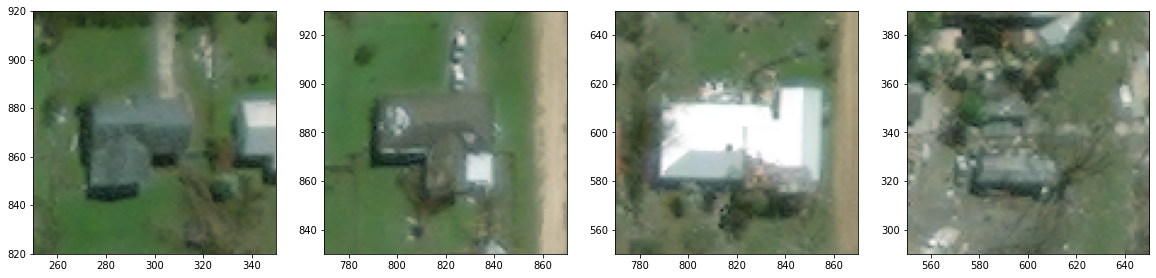

In [ ]:

img=rio.open('/content/drive/MyDrive/ai4er/python/hurricane/hurricane-harm-herald/data/datasets/xBD_data/geotiffs.old/hold/images/hurricane-michael_00000215_post_disaster.tif')
img_array = img.read().astype('float64')
fig,axes=plt.subplots(1,4,figsize=(20,20))

for i in range(4):
    ax=axes[i]
    rio.plot.show(img.read(),ax=ax)
    b_position=np.array([[300,870],[820,880],[820,600],[600,340]])
    x=b_position[i,0]
    y=b_position[i,1]
    buffer=50
    ax.set_xlim(x-buffer,x+buffer)
    ax.set_ylim(y-buffer,y+buffer)


plt.show()

# Merge DEM data

In [ ]:
extracted_path='/content/drive/MyDrive/ai4er/python/hurricane/hurricane-harm-herald/data/datasets/EFs/terrain_data/DEM_data/DEM_extracted/'
with rio.open(f'{extracted_path}ASTGTMV003_N18W075_dem.tif') as src1:
  with rio.open(f'{extracted_path}ASTGTMV003_N18W074_dem.tif') as src2:
    merged_data, merged_transform = merge([src1, src2])
    profile = src1.profile
    profile.update(transform=merged_transform, height=merged_data.shape[1], width=merged_data.shape[2])
    with rio.open(f'{extracted_path}merged_N18W7574.tif', 'w', **profile) as dst:
      dst.write(merged_data)

files = [f'{extracted_path}ASTGTMV003_N33W080_dem.tif', f'{extracted_path}ASTGTMV003_N33W079_dem.tif',
         f'{extracted_path}ASTGTMV003_N33W078_dem.tif',f'{extracted_path}ASTGTMV003_N34W080_dem.tif',
         f'{extracted_path}ASTGTMV003_N34W079_dem.tif',f'{extracted_path}ASTGTMV003_N34W078_dem.tif']
datasets = [rio.open(f) for f in files]
merged, out_trans = merge(datasets)
out_meta = datasets[0].meta.copy()
out_meta.update({"driver": "GTiff",
                 "height": merged.shape[1],
                 "width": merged.shape[2],
                 "transform": out_trans})

with rio.open(f'{extracted_path}merged_N33W80.tif', 'w', **out_meta) as dest:
    dest.write(merged)


with rio.open(f'{extracted_path}ASTGTMV003_N29W096_dem.tif') as src1:
  with rio.open(f'{extracted_path}ASTGTMV003_N30W096_dem.tif') as src2:
    merged_data, merged_transform = merge([src1, src2])
    profile = src1.profile
    profile.update(transform=merged_transform, height=merged_data.shape[1], width=merged_data.shape[2])
    with rio.open(f'{extracted_path}merged_N2930W96.tif', 'w', **profile) as dst:
      dst.write(merged_data)

extracted_path='/content/drive/MyDrive/ai4er/python/hurricane/hurricane-harm-herald/data/datasets/EFs/terrain_data/DEM_data/DEM_extracted/'
dem_list=[f'{extracted_path}merged_N33W80.tif',f'{extracted_path}merged_N2930W96.tif',f'{extracted_path}merged_N18W7574.tif',f'{extracted_path}ASTGTMV003_N30W086_dem.tif']